In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x_5degree = x_csv[:, 0:15]

In [7]:
x = x_5degree.reshape((73*6, n_sensors, 1))

In [8]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [9]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [10]:
y = y_5degree.reshape((73*6, 100, 100))

In [11]:
tsr = x_csv[:, -2]

In [12]:
theta = x_csv[:, -1]

In [13]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [14]:
print(y_train.shape)

(306, 100, 100)


In [15]:
print(y_test.shape)

(132, 100, 100)


In [16]:
print(x_train.shape)

(306, 15, 1)


In [17]:
print(x_test.shape)

(132, 15, 1)


In [18]:
theta_train

array([225., 205., 340., 315., 160., 210., 260., 305., 120., 145., 300.,
       170., 265., 180., 330., 360.,  90.,  80., 165.,  50., 210., 130.,
         5., 295., 110., 230., 245., 115., 235., 140., 310., 245.,  45.,
       220.,  15., 180., 330., 140., 190., 100., 170., 295., 190., 250.,
       310.,  30., 120.,  50.,  60.,  20., 155.,  50.,  60., 150.,  40.,
       150., 275., 105., 225., 200., 150.,  60., 320., 240.,  80., 105.,
        85., 290.,   5.,  10.,  95., 345.,  85., 250., 155., 115., 350.,
       200., 215., 120.,  25., 340., 115., 185., 355., 245., 145., 280.,
       180., 335., 260., 235.,  55.,  75., 210., 275.,  95., 260.,   0.,
       215.,  50.,  20.,  45.,  65.,  15.,   0., 145.,  20., 125., 335.,
       195., 185., 135.,  95., 180.,  90., 280., 190.,  55.,  25., 195.,
        30., 270., 195., 165., 245.,  20., 340., 280.,  95.,  70., 260.,
        90., 315., 255., 195.,  65., 210., 235.,  25., 305.,  10., 270.,
       350., 170., 165., 300., 140., 220., 185., 32

In [19]:
tsr_train

array([1.6, 1.6, 1.6, 1.7, 1.9, 1.9, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7,
       1.6, 2. , 1.6, 1.8, 2. , 2. , 1.6, 2. , 1.7, 1.6, 1.9, 2. , 1.6,
       2. , 2. , 1.7, 1.8, 1.8, 1.7, 1.9, 1.9, 1.8, 1.5, 1.6, 1.9, 1.7,
       1.8, 1.8, 1.5, 1.6, 1.7, 1.7, 1.5, 1.9, 1.9, 1.7, 1.7, 1.7, 1.5,
       1.8, 1.6, 1.6, 1.8, 1.8, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6,
       2. , 1.7, 1.7, 1.7, 1.5, 1.6, 1.5, 2. , 1.6, 1.9, 1.6, 1.6, 1.9,
       1.8, 1.6, 2. , 1.5, 1.5, 1.5, 1.6, 1.6, 2. , 1.7, 1.7, 1.5, 2. ,
       1.8, 2. , 1.9, 1.8, 1.9, 1.8, 1.6, 1.7, 1.9, 2. , 1.8, 1.8, 1.6,
       2. , 1.8, 1.8, 2. , 1.8, 1.8, 1.9, 1.7, 1.8, 1.9, 1.8, 1.9, 1.6,
       1.5, 1.5, 1.9, 1.7, 1.9, 1.9, 1.6, 1.7, 1.8, 1.9, 1.8, 2. , 2. ,
       1.8, 1.8, 1.7, 1.6, 1.7, 1.8, 1.8, 1.6, 1.6, 1.8, 1.9, 1.9, 1.6,
       1.9, 1.6, 1.9, 1.6, 2. , 1.5, 2. , 1.5, 1.8, 1.6, 1.8, 1.7, 1.7,
       1.5, 1.5, 1.5, 1.7, 1.6, 1.9, 1.9, 1.8, 1.6, 1.5, 1.8, 1.9, 1.9,
       1.7, 1.5, 1.9, 1.7, 1.8, 1.8, 2. , 1.5, 1.8, 2. , 1.6, 1.

In [20]:
os.chdir('C:\\Users\\User')

In [21]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [22]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [23]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [24]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
8/8 [==============================] - 1s 6ms/step - loss: 0.0110 - rmse: 0.1043
Epoch 2/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1038
Epoch 3/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1032
Epoch 4/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1023
Epoch 5/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0103 - rmse: 0.1008
Epoch 6/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0097 - rmse: 0.0979
Epoch 7/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0087 - rmse: 0.0926
Epoch 8/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0871
Epoch 9/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0851
Epoch 10/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 11/10000
8/8 [=============================

8/8 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0438
Epoch 87/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0435
Epoch 88/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0430
Epoch 89/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0426
Epoch 90/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0422
Epoch 91/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0418
Epoch 92/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0414
Epoch 93/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0410
Epoch 94/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0406
Epoch 95/10000
8/8 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0402
Epoch 96/10000
8/8 [==============================] - 0

8/8 [==============================] - 0s 5ms/step - loss: 6.6656e-04 - rmse: 0.0224
Epoch 170/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6114e-04 - rmse: 0.0223
Epoch 171/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.5453e-04 - rmse: 0.0221
Epoch 172/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4682e-04 - rmse: 0.0219
Epoch 173/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.4360e-04 - rmse: 0.0219
Epoch 174/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3572e-04 - rmse: 0.0217
Epoch 175/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.2982e-04 - rmse: 0.0216
Epoch 176/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.2304e-04 - rmse: 0.0214
Epoch 177/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.1706e-04 - rmse: 0.0213
Epoch 178/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1146e-04 - rmse: 0.0211
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 3.5282e-04 - rmse: 0.0138
Epoch 251/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5127e-04 - rmse: 0.0137
Epoch 252/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5105e-04 - rmse: 0.0137
Epoch 253/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4918e-04 - rmse: 0.0136
Epoch 254/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4637e-04 - rmse: 0.0135
Epoch 255/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4591e-04 - rmse: 0.0135
Epoch 256/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4297e-04 - rmse: 0.0134
Epoch 257/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4129e-04 - rmse: 0.0134
Epoch 258/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4044e-04 - rmse: 0.0133
Epoch 259/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3755e-04 - rmse: 0.0132
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 2.5664e-04 - rmse: 0.0099
Epoch 332/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5514e-04 - rmse: 0.0098
Epoch 333/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5475e-04 - rmse: 0.0098
Epoch 334/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5395e-04 - rmse: 0.0098
Epoch 335/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5335e-04 - rmse: 0.0097
Epoch 336/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5353e-04 - rmse: 0.0098
Epoch 337/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5246e-04 - rmse: 0.0097
Epoch 338/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5196e-04 - rmse: 0.0097
Epoch 339/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5108e-04 - rmse: 0.0096
Epoch 340/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4940e-04 - rmse: 0.0096
Epoch 

8/8 [==============================] - 0s 6ms/step - loss: 2.1303e-04 - rmse: 0.0078
Epoch 413/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.1271e-04 - rmse: 0.0078
Epoch 414/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.1187e-04 - rmse: 0.0077
Epoch 415/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1154e-04 - rmse: 0.0077
Epoch 416/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1091e-04 - rmse: 0.0077
Epoch 417/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.1015e-04 - rmse: 0.0076
Epoch 418/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0997e-04 - rmse: 0.0076
Epoch 419/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0984e-04 - rmse: 0.0076
Epoch 420/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0921e-04 - rmse: 0.0076
Epoch 421/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.0871e-04 - rmse: 0.0075
Epoch 

8/8 [==============================] - 0s 6ms/step - loss: 1.8678e-04 - rmse: 0.0064
Epoch 494/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8639e-04 - rmse: 0.0064
Epoch 495/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8625e-04 - rmse: 0.0064
Epoch 496/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.8638e-04 - rmse: 0.0064
Epoch 497/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.8599e-04 - rmse: 0.0064
Epoch 498/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.8562e-04 - rmse: 0.0063
Epoch 499/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8539e-04 - rmse: 0.0063
Epoch 500/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8506e-04 - rmse: 0.0063
Epoch 501/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8473e-04 - rmse: 0.0063
Epoch 502/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.8436e-04 - rmse: 0.0063
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.6896e-04 - rmse: 0.0055
Epoch 575/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6887e-04 - rmse: 0.0055
Epoch 576/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6855e-04 - rmse: 0.0055
Epoch 577/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6839e-04 - rmse: 0.0055
Epoch 578/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6801e-04 - rmse: 0.0055
Epoch 579/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6786e-04 - rmse: 0.0054
Epoch 580/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6774e-04 - rmse: 0.0054
Epoch 581/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6752e-04 - rmse: 0.0054
Epoch 582/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6747e-04 - rmse: 0.0054
Epoch 583/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.6732e-04 - rmse: 0.0054
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.5452e-04 - rmse: 0.0048
Epoch 656/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.5440e-04 - rmse: 0.0048
Epoch 657/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5434e-04 - rmse: 0.0048
Epoch 658/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5411e-04 - rmse: 0.0048
Epoch 659/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.5387e-04 - rmse: 0.0048
Epoch 660/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5359e-04 - rmse: 0.0048
Epoch 661/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5337e-04 - rmse: 0.0048
Epoch 662/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.5333e-04 - rmse: 0.0048
Epoch 663/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5316e-04 - rmse: 0.0048
Epoch 664/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.5309e-04 - rmse: 0.0048
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.4291e-04 - rmse: 0.0043
Epoch 737/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4271e-04 - rmse: 0.0043
Epoch 738/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4256e-04 - rmse: 0.0043
Epoch 739/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4237e-04 - rmse: 0.0043
Epoch 740/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.4212e-04 - rmse: 0.0043
Epoch 741/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4195e-04 - rmse: 0.0043
Epoch 742/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.4181e-04 - rmse: 0.0043
Epoch 743/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4175e-04 - rmse: 0.0043
Epoch 744/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4170e-04 - rmse: 0.0043
Epoch 745/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4152e-04 - rmse: 0.0043
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.3316e-04 - rmse: 0.0040
Epoch 818/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3284e-04 - rmse: 0.0040
Epoch 819/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3267e-04 - rmse: 0.0040
Epoch 820/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3236e-04 - rmse: 0.0040
Epoch 821/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3233e-04 - rmse: 0.0040
Epoch 822/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3220e-04 - rmse: 0.0040
Epoch 823/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3199e-04 - rmse: 0.0039
Epoch 824/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.3175e-04 - rmse: 0.0039
Epoch 825/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3155e-04 - rmse: 0.0039
Epoch 826/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.3168e-04 - rmse: 0.0039
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.2372e-04 - rmse: 0.0037
Epoch 899/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2363e-04 - rmse: 0.0037
Epoch 900/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2368e-04 - rmse: 0.0037
Epoch 901/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2356e-04 - rmse: 0.0037
Epoch 902/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2369e-04 - rmse: 0.0037
Epoch 903/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2369e-04 - rmse: 0.0037
Epoch 904/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2345e-04 - rmse: 0.0037
Epoch 905/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2331e-04 - rmse: 0.0037
Epoch 906/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2311e-04 - rmse: 0.0037
Epoch 907/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.2300e-04 - rmse: 0.0037
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.1578e-04 - rmse: 0.0034
Epoch 980/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1568e-04 - rmse: 0.0034
Epoch 981/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1560e-04 - rmse: 0.0034
Epoch 982/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1553e-04 - rmse: 0.0034
Epoch 983/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1558e-04 - rmse: 0.0034
Epoch 984/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.1548e-04 - rmse: 0.0034
Epoch 985/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1533e-04 - rmse: 0.0034
Epoch 986/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1536e-04 - rmse: 0.0034
Epoch 987/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1526e-04 - rmse: 0.0034
Epoch 988/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.1517e-04 - rmse: 0.0034
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 1.0911e-04 - rmse: 0.0033
Epoch 1060/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0910e-04 - rmse: 0.0033
Epoch 1061/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0896e-04 - rmse: 0.0033
Epoch 1062/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0877e-04 - rmse: 0.0033
Epoch 1063/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0872e-04 - rmse: 0.0033
Epoch 1064/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0859e-04 - rmse: 0.0033
Epoch 1065/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0838e-04 - rmse: 0.0032
Epoch 1066/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0829e-04 - rmse: 0.0032
Epoch 1067/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0811e-04 - rmse: 0.0032
Epoch 1068/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0820e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 1.0285e-04 - rmse: 0.0032
Epoch 1140/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0280e-04 - rmse: 0.0032
Epoch 1141/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0280e-04 - rmse: 0.0032
Epoch 1142/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0272e-04 - rmse: 0.0032
Epoch 1143/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0242e-04 - rmse: 0.0031
Epoch 1144/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.0225e-04 - rmse: 0.0031
Epoch 1145/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0206e-04 - rmse: 0.0031
Epoch 1146/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0230e-04 - rmse: 0.0031
Epoch 1147/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0250e-04 - rmse: 0.0032
Epoch 1148/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0225e-04 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 9.6983e-05 - rmse: 0.0030
Epoch 1220/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6880e-05 - rmse: 0.0030
Epoch 1221/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6903e-05 - rmse: 0.0030
Epoch 1222/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6705e-05 - rmse: 0.0030
Epoch 1223/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6650e-05 - rmse: 0.0030
Epoch 1224/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6578e-05 - rmse: 0.0030
Epoch 1225/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6498e-05 - rmse: 0.0030
Epoch 1226/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6534e-05 - rmse: 0.0030
Epoch 1227/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6505e-05 - rmse: 0.0030
Epoch 1228/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.6406e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 9.2028e-05 - rmse: 0.0029
Epoch 1300/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2125e-05 - rmse: 0.0029
Epoch 1301/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2050e-05 - rmse: 0.0029
Epoch 1302/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2027e-05 - rmse: 0.0029
Epoch 1303/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1918e-05 - rmse: 0.0029
Epoch 1304/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1941e-05 - rmse: 0.0029
Epoch 1305/10000
8/8 [==============================] - 0s 6ms/step - loss: 9.1912e-05 - rmse: 0.0029
Epoch 1306/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.2042e-05 - rmse: 0.0030
Epoch 1307/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1812e-05 - rmse: 0.0029
Epoch 1308/10000
8/8 [==============================] - 0s 5ms/step - loss: 9.1677e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 8.7326e-05 - rmse: 0.0028
Epoch 1380/10000
8/8 [==============================] - 0s 6ms/step - loss: 8.7289e-05 - rmse: 0.0028
Epoch 1381/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7319e-05 - rmse: 0.0028
Epoch 1382/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7152e-05 - rmse: 0.0028
Epoch 1383/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7023e-05 - rmse: 0.0028
Epoch 1384/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7046e-05 - rmse: 0.0028
Epoch 1385/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.7012e-05 - rmse: 0.0028
Epoch 1386/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6937e-05 - rmse: 0.0028
Epoch 1387/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6863e-05 - rmse: 0.0028
Epoch 1388/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.6765e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 8.3182e-05 - rmse: 0.0027
Epoch 1460/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.3043e-05 - rmse: 0.0027
Epoch 1461/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2933e-05 - rmse: 0.0027
Epoch 1462/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2946e-05 - rmse: 0.0027
Epoch 1463/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2894e-05 - rmse: 0.0027
Epoch 1464/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2868e-05 - rmse: 0.0027
Epoch 1465/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2749e-05 - rmse: 0.0027
Epoch 1466/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2660e-05 - rmse: 0.0027
Epoch 1467/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2554e-05 - rmse: 0.0027
Epoch 1468/10000
8/8 [==============================] - 0s 5ms/step - loss: 8.2534e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.8979e-05 - rmse: 0.0026
Epoch 1540/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.9112e-05 - rmse: 0.0026
Epoch 1541/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9238e-05 - rmse: 0.0027
Epoch 1542/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9175e-05 - rmse: 0.0027
Epoch 1543/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9207e-05 - rmse: 0.0027
Epoch 1544/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9256e-05 - rmse: 0.0027
Epoch 1545/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.9230e-05 - rmse: 0.0027
Epoch 1546/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8969e-05 - rmse: 0.0027
Epoch 1547/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8867e-05 - rmse: 0.0026
Epoch 1548/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.8782e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.5660e-05 - rmse: 0.0026
Epoch 1620/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5639e-05 - rmse: 0.0026
Epoch 1621/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5558e-05 - rmse: 0.0026
Epoch 1622/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5589e-05 - rmse: 0.0026
Epoch 1623/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5581e-05 - rmse: 0.0026
Epoch 1624/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5399e-05 - rmse: 0.0026
Epoch 1625/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5480e-05 - rmse: 0.0026
Epoch 1626/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5319e-05 - rmse: 0.0026
Epoch 1627/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5287e-05 - rmse: 0.0026
Epoch 1628/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.5304e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 7.2401e-05 - rmse: 0.0025
Epoch 1700/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.2381e-05 - rmse: 0.0025
Epoch 1701/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.2398e-05 - rmse: 0.0025
Epoch 1702/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2206e-05 - rmse: 0.0025
Epoch 1703/10000
8/8 [==============================] - 0s 6ms/step - loss: 7.2157e-05 - rmse: 0.0025
Epoch 1704/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2146e-05 - rmse: 0.0025
Epoch 1705/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2216e-05 - rmse: 0.0025
Epoch 1706/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2103e-05 - rmse: 0.0025
Epoch 1707/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2138e-05 - rmse: 0.0025
Epoch 1708/10000
8/8 [==============================] - 0s 5ms/step - loss: 7.2003e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.9314e-05 - rmse: 0.0024
Epoch 1780/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9316e-05 - rmse: 0.0024
Epoch 1781/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9307e-05 - rmse: 0.0025
Epoch 1782/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9251e-05 - rmse: 0.0024
Epoch 1783/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.9226e-05 - rmse: 0.0024
Epoch 1784/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.9074e-05 - rmse: 0.0024
Epoch 1785/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9074e-05 - rmse: 0.0024
Epoch 1786/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9092e-05 - rmse: 0.0024
Epoch 1787/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9101e-05 - rmse: 0.0025
Epoch 1788/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.9051e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.6556e-05 - rmse: 0.0024
Epoch 1860/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.6596e-05 - rmse: 0.0024
Epoch 1861/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6436e-05 - rmse: 0.0024
Epoch 1862/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6488e-05 - rmse: 0.0024
Epoch 1863/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6505e-05 - rmse: 0.0024
Epoch 1864/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6680e-05 - rmse: 0.0024
Epoch 1865/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6965e-05 - rmse: 0.0025
Epoch 1866/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.6794e-05 - rmse: 0.0025
Epoch 1867/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6748e-05 - rmse: 0.0025
Epoch 1868/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.6468e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 6.3974e-05 - rmse: 0.0023
Epoch 1940/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3949e-05 - rmse: 0.0023
Epoch 1941/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3951e-05 - rmse: 0.0023
Epoch 1942/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3978e-05 - rmse: 0.0023
Epoch 1943/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3849e-05 - rmse: 0.0023
Epoch 1944/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3882e-05 - rmse: 0.0023
Epoch 1945/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3791e-05 - rmse: 0.0023
Epoch 1946/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3678e-05 - rmse: 0.0023
Epoch 1947/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.3717e-05 - rmse: 0.0023
Epoch 1948/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.3773e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 6.1660e-05 - rmse: 0.0023
Epoch 2020/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.1639e-05 - rmse: 0.0023
Epoch 2021/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1664e-05 - rmse: 0.0023
Epoch 2022/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1588e-05 - rmse: 0.0023
Epoch 2023/10000
8/8 [==============================] - 0s 6ms/step - loss: 6.1610e-05 - rmse: 0.0023
Epoch 2024/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1620e-05 - rmse: 0.0023
Epoch 2025/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1578e-05 - rmse: 0.0023
Epoch 2026/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1602e-05 - rmse: 0.0023
Epoch 2027/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1559e-05 - rmse: 0.0023
Epoch 2028/10000
8/8 [==============================] - 0s 5ms/step - loss: 6.1581e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 5.9464e-05 - rmse: 0.0022
Epoch 2100/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.9454e-05 - rmse: 0.0022
Epoch 2101/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.9467e-05 - rmse: 0.0022
Epoch 2102/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.9362e-05 - rmse: 0.0022
Epoch 2103/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.9361e-05 - rmse: 0.0022
Epoch 2104/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.9401e-05 - rmse: 0.0022
Epoch 2105/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.9429e-05 - rmse: 0.0022
Epoch 2106/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.9438e-05 - rmse: 0.0023
Epoch 2107/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.9328e-05 - rmse: 0.0022
Epoch 2108/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.9373e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 5.7946e-05 - rmse: 0.0023
Epoch 2180/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.7853e-05 - rmse: 0.0023
Epoch 2181/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.7735e-05 - rmse: 0.0023
Epoch 2182/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.7676e-05 - rmse: 0.0022
Epoch 2183/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.7550e-05 - rmse: 0.0022
Epoch 2184/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.7421e-05 - rmse: 0.0022
Epoch 2185/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.7382e-05 - rmse: 0.0022
Epoch 2186/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.7376e-05 - rmse: 0.0022
Epoch 2187/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.7367e-05 - rmse: 0.0022
Epoch 2188/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.7402e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 5.5747e-05 - rmse: 0.0022
Epoch 2260/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.5763e-05 - rmse: 0.0022
Epoch 2261/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.5727e-05 - rmse: 0.0022
Epoch 2262/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.5578e-05 - rmse: 0.0021
Epoch 2263/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.5596e-05 - rmse: 0.0022
Epoch 2264/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.5736e-05 - rmse: 0.0022
Epoch 2265/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.5642e-05 - rmse: 0.0022
Epoch 2266/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.5641e-05 - rmse: 0.0022
Epoch 2267/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.5453e-05 - rmse: 0.0021
Epoch 2268/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.5475e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 5.4090e-05 - rmse: 0.0022
Epoch 2340/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.3989e-05 - rmse: 0.0021
Epoch 2341/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3970e-05 - rmse: 0.0021
Epoch 2342/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.3973e-05 - rmse: 0.0021
Epoch 2343/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3962e-05 - rmse: 0.0021
Epoch 2344/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3923e-05 - rmse: 0.0021
Epoch 2345/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.3871e-05 - rmse: 0.0021
Epoch 2346/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3883e-05 - rmse: 0.0021
Epoch 2347/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3978e-05 - rmse: 0.0022
Epoch 2348/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.3897e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 5.2772e-05 - rmse: 0.0022
Epoch 2420/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.2640e-05 - rmse: 0.0021
Epoch 2421/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.2601e-05 - rmse: 0.0021
Epoch 2422/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.2380e-05 - rmse: 0.0021
Epoch 2423/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.2353e-05 - rmse: 0.0021
Epoch 2424/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.2222e-05 - rmse: 0.0021
Epoch 2425/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.2197e-05 - rmse: 0.0021
Epoch 2426/10000
8/8 [==============================] - 0s 6ms/step - loss: 5.2196e-05 - rmse: 0.0021
Epoch 2427/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.2252e-05 - rmse: 0.0021
Epoch 2428/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.2239e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 5.0979e-05 - rmse: 0.0021
Epoch 2500/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0966e-05 - rmse: 0.0021
Epoch 2501/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0955e-05 - rmse: 0.0021
Epoch 2502/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0942e-05 - rmse: 0.0021
Epoch 2503/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0898e-05 - rmse: 0.0021
Epoch 2504/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0863e-05 - rmse: 0.0020
Epoch 2505/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0826e-05 - rmse: 0.0020
Epoch 2506/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0890e-05 - rmse: 0.0021
Epoch 2507/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.0973e-05 - rmse: 0.0021
Epoch 2508/10000
8/8 [==============================] - 0s 5ms/step - loss: 5.1098e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.9624e-05 - rmse: 0.0020
Epoch 2580/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.9714e-05 - rmse: 0.0021
Epoch 2581/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.9682e-05 - rmse: 0.0021
Epoch 2582/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.9545e-05 - rmse: 0.0020
Epoch 2583/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.9639e-05 - rmse: 0.0021
Epoch 2584/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.9618e-05 - rmse: 0.0021
Epoch 2585/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.9637e-05 - rmse: 0.0021
Epoch 2586/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.9692e-05 - rmse: 0.0021
Epoch 2587/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.9579e-05 - rmse: 0.0021
Epoch 2588/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.9545e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.8447e-05 - rmse: 0.0020
Epoch 2660/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8378e-05 - rmse: 0.0020
Epoch 2661/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8637e-05 - rmse: 0.0021
Epoch 2662/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8640e-05 - rmse: 0.0021
Epoch 2663/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.8496e-05 - rmse: 0.0021
Epoch 2664/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8384e-05 - rmse: 0.0020
Epoch 2665/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8395e-05 - rmse: 0.0021
Epoch 2666/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8494e-05 - rmse: 0.0021
Epoch 2667/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8263e-05 - rmse: 0.0020
Epoch 2668/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.8256e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.7030e-05 - rmse: 0.0020
Epoch 2740/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.7000e-05 - rmse: 0.0020
Epoch 2741/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7036e-05 - rmse: 0.0020
Epoch 2742/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6991e-05 - rmse: 0.0020
Epoch 2743/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7078e-05 - rmse: 0.0020
Epoch 2744/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7135e-05 - rmse: 0.0020
Epoch 2745/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7266e-05 - rmse: 0.0020
Epoch 2746/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7323e-05 - rmse: 0.0021
Epoch 2747/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.7929e-05 - rmse: 0.0022
Epoch 2748/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.8158e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.6067e-05 - rmse: 0.0020
Epoch 2820/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.6046e-05 - rmse: 0.0020
Epoch 2821/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.5932e-05 - rmse: 0.0020
Epoch 2822/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.5929e-05 - rmse: 0.0020
Epoch 2823/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.6026e-05 - rmse: 0.0020
Epoch 2824/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6309e-05 - rmse: 0.0021
Epoch 2825/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6241e-05 - rmse: 0.0020
Epoch 2826/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6104e-05 - rmse: 0.0020
Epoch 2827/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6117e-05 - rmse: 0.0020
Epoch 2828/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.6000e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.4966e-05 - rmse: 0.0020
Epoch 2900/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4857e-05 - rmse: 0.0019
Epoch 2901/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4725e-05 - rmse: 0.0019
Epoch 2902/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4780e-05 - rmse: 0.0019
Epoch 2903/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4922e-05 - rmse: 0.0020
Epoch 2904/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4950e-05 - rmse: 0.0020
Epoch 2905/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.4985e-05 - rmse: 0.0020
Epoch 2906/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.5273e-05 - rmse: 0.0020
Epoch 2907/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.5151e-05 - rmse: 0.0020
Epoch 2908/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.4977e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.3869e-05 - rmse: 0.0019
Epoch 2980/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3793e-05 - rmse: 0.0019
Epoch 2981/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3793e-05 - rmse: 0.0019
Epoch 2982/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3781e-05 - rmse: 0.0019
Epoch 2983/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3855e-05 - rmse: 0.0019
Epoch 2984/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3828e-05 - rmse: 0.0019
Epoch 2985/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3764e-05 - rmse: 0.0019
Epoch 2986/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3793e-05 - rmse: 0.0019
Epoch 2987/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.3780e-05 - rmse: 0.0019
Epoch 2988/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.3899e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.2935e-05 - rmse: 0.0019
Epoch 3060/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.2955e-05 - rmse: 0.0019
Epoch 3061/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2888e-05 - rmse: 0.0019
Epoch 3062/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2833e-05 - rmse: 0.0019
Epoch 3063/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2815e-05 - rmse: 0.0019
Epoch 3064/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.2762e-05 - rmse: 0.0019
Epoch 3065/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2785e-05 - rmse: 0.0019
Epoch 3066/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2798e-05 - rmse: 0.0019
Epoch 3067/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2785e-05 - rmse: 0.0019
Epoch 3068/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2909e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.2042e-05 - rmse: 0.0019
Epoch 3140/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.2003e-05 - rmse: 0.0019
Epoch 3141/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1983e-05 - rmse: 0.0019
Epoch 3142/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1951e-05 - rmse: 0.0018
Epoch 3143/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1919e-05 - rmse: 0.0018
Epoch 3144/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1949e-05 - rmse: 0.0018
Epoch 3145/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1996e-05 - rmse: 0.0019
Epoch 3146/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2016e-05 - rmse: 0.0019
Epoch 3147/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2159e-05 - rmse: 0.0019
Epoch 3148/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.2207e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 4.1154e-05 - rmse: 0.0018
Epoch 3220/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1156e-05 - rmse: 0.0018
Epoch 3221/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1267e-05 - rmse: 0.0019
Epoch 3222/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1318e-05 - rmse: 0.0019
Epoch 3223/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1414e-05 - rmse: 0.0019
Epoch 3224/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1844e-05 - rmse: 0.0020
Epoch 3225/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.1602e-05 - rmse: 0.0020
Epoch 3226/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1424e-05 - rmse: 0.0019
Epoch 3227/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.1246e-05 - rmse: 0.0019
Epoch 3228/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.1190e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 4.0488e-05 - rmse: 0.0018
Epoch 3300/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0502e-05 - rmse: 0.0018
Epoch 3301/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0450e-05 - rmse: 0.0018
Epoch 3302/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0419e-05 - rmse: 0.0018
Epoch 3303/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0463e-05 - rmse: 0.0018
Epoch 3304/10000
8/8 [==============================] - 0s 6ms/step - loss: 4.0497e-05 - rmse: 0.0019
Epoch 3305/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0541e-05 - rmse: 0.0019
Epoch 3306/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0472e-05 - rmse: 0.0018
Epoch 3307/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0461e-05 - rmse: 0.0018
Epoch 3308/10000
8/8 [==============================] - 0s 5ms/step - loss: 4.0313e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.9752e-05 - rmse: 0.0018
Epoch 3380/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.9712e-05 - rmse: 0.0018
Epoch 3381/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9713e-05 - rmse: 0.0018
Epoch 3382/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9886e-05 - rmse: 0.0019
Epoch 3383/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9821e-05 - rmse: 0.0019
Epoch 3384/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9822e-05 - rmse: 0.0019
Epoch 3385/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9754e-05 - rmse: 0.0018
Epoch 3386/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9669e-05 - rmse: 0.0018
Epoch 3387/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9635e-05 - rmse: 0.0018
Epoch 3388/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.9634e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.9007e-05 - rmse: 0.0018
Epoch 3460/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9030e-05 - rmse: 0.0018
Epoch 3461/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8990e-05 - rmse: 0.0018
Epoch 3462/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9009e-05 - rmse: 0.0018
Epoch 3463/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9276e-05 - rmse: 0.0019
Epoch 3464/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9203e-05 - rmse: 0.0019
Epoch 3465/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.9348e-05 - rmse: 0.0019
Epoch 3466/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9102e-05 - rmse: 0.0018
Epoch 3467/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9237e-05 - rmse: 0.0019
Epoch 3468/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.9352e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.8856e-05 - rmse: 0.0019
Epoch 3540/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8692e-05 - rmse: 0.0019
Epoch 3541/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8556e-05 - rmse: 0.0018
Epoch 3542/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8682e-05 - rmse: 0.0019
Epoch 3543/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8587e-05 - rmse: 0.0019
Epoch 3544/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.8545e-05 - rmse: 0.0018
Epoch 3545/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8644e-05 - rmse: 0.0019
Epoch 3546/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8501e-05 - rmse: 0.0018
Epoch 3547/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8649e-05 - rmse: 0.0019
Epoch 3548/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.8747e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.7614e-05 - rmse: 0.0017
Epoch 3620/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7622e-05 - rmse: 0.0017
Epoch 3621/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7622e-05 - rmse: 0.0017
Epoch 3622/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7650e-05 - rmse: 0.0017
Epoch 3623/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7761e-05 - rmse: 0.0018
Epoch 3624/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7857e-05 - rmse: 0.0018
Epoch 3625/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.8192e-05 - rmse: 0.0019
Epoch 3626/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7982e-05 - rmse: 0.0018
Epoch 3627/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7850e-05 - rmse: 0.0018
Epoch 3628/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7799e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.7227e-05 - rmse: 0.0018
Epoch 3700/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7273e-05 - rmse: 0.0018
Epoch 3701/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7344e-05 - rmse: 0.0018
Epoch 3702/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7268e-05 - rmse: 0.0018
Epoch 3703/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7266e-05 - rmse: 0.0018
Epoch 3704/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.7201e-05 - rmse: 0.0018
Epoch 3705/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7272e-05 - rmse: 0.0018
Epoch 3706/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7437e-05 - rmse: 0.0018
Epoch 3707/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.7295e-05 - rmse: 0.0018
Epoch 3708/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7183e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.6563e-05 - rmse: 0.0017
Epoch 3780/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.6573e-05 - rmse: 0.0017
Epoch 3781/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6816e-05 - rmse: 0.0018
Epoch 3782/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6856e-05 - rmse: 0.0018
Epoch 3783/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6993e-05 - rmse: 0.0019
Epoch 3784/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6971e-05 - rmse: 0.0019
Epoch 3785/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.7139e-05 - rmse: 0.0019
Epoch 3786/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6881e-05 - rmse: 0.0018
Epoch 3787/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6700e-05 - rmse: 0.0018
Epoch 3788/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6657e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 3.6187e-05 - rmse: 0.0018
Epoch 3860/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6280e-05 - rmse: 0.0018
Epoch 3861/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6278e-05 - rmse: 0.0018
Epoch 3862/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6101e-05 - rmse: 0.0017
Epoch 3863/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6134e-05 - rmse: 0.0017
Epoch 3864/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6112e-05 - rmse: 0.0017
Epoch 3865/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6125e-05 - rmse: 0.0017
Epoch 3866/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6098e-05 - rmse: 0.0017
Epoch 3867/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6243e-05 - rmse: 0.0018
Epoch 3868/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.6492e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 3.5563e-05 - rmse: 0.0017
Epoch 3940/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5504e-05 - rmse: 0.0017
Epoch 3941/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5556e-05 - rmse: 0.0017
Epoch 3942/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5540e-05 - rmse: 0.0017
Epoch 3943/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5597e-05 - rmse: 0.0017
Epoch 3944/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.5598e-05 - rmse: 0.0017
Epoch 3945/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5611e-05 - rmse: 0.0017
Epoch 3946/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5673e-05 - rmse: 0.0018
Epoch 3947/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5633e-05 - rmse: 0.0017
Epoch 3948/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5572e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.5445e-05 - rmse: 0.0018
Epoch 4020/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5412e-05 - rmse: 0.0018
Epoch 4021/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5325e-05 - rmse: 0.0018
Epoch 4022/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5254e-05 - rmse: 0.0017
Epoch 4023/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5220e-05 - rmse: 0.0017
Epoch 4024/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5115e-05 - rmse: 0.0017
Epoch 4025/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5224e-05 - rmse: 0.0017
Epoch 4026/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.5076e-05 - rmse: 0.0017
Epoch 4027/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5055e-05 - rmse: 0.0017
Epoch 4028/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.5096e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.4578e-05 - rmse: 0.0017
Epoch 4100/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4545e-05 - rmse: 0.0017
Epoch 4101/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.4532e-05 - rmse: 0.0017
Epoch 4102/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.4573e-05 - rmse: 0.0017
Epoch 4103/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4646e-05 - rmse: 0.0017
Epoch 4104/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4987e-05 - rmse: 0.0018
Epoch 4105/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.4865e-05 - rmse: 0.0018
Epoch 4106/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4900e-05 - rmse: 0.0018
Epoch 4107/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4829e-05 - rmse: 0.0018
Epoch 4108/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4594e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 3.4276e-05 - rmse: 0.0017
Epoch 4180/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4219e-05 - rmse: 0.0017
Epoch 4181/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4321e-05 - rmse: 0.0017
Epoch 4182/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4217e-05 - rmse: 0.0017
Epoch 4183/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4209e-05 - rmse: 0.0017
Epoch 4184/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4199e-05 - rmse: 0.0017
Epoch 4185/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4155e-05 - rmse: 0.0017
Epoch 4186/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4059e-05 - rmse: 0.0016
Epoch 4187/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4136e-05 - rmse: 0.0017
Epoch 4188/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.4104e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.4104e-05 - rmse: 0.0018
Epoch 4260/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3966e-05 - rmse: 0.0017
Epoch 4261/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3842e-05 - rmse: 0.0017
Epoch 4262/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3880e-05 - rmse: 0.0017
Epoch 4263/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3983e-05 - rmse: 0.0017
Epoch 4264/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3867e-05 - rmse: 0.0017
Epoch 4265/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3777e-05 - rmse: 0.0017
Epoch 4266/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3770e-05 - rmse: 0.0017
Epoch 4267/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3765e-05 - rmse: 0.0017
Epoch 4268/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3749e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 3.3466e-05 - rmse: 0.0017
Epoch 4340/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3452e-05 - rmse: 0.0017
Epoch 4341/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3413e-05 - rmse: 0.0017
Epoch 4342/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3584e-05 - rmse: 0.0017
Epoch 4343/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3508e-05 - rmse: 0.0017
Epoch 4344/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3416e-05 - rmse: 0.0017
Epoch 4345/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.3365e-05 - rmse: 0.0017
Epoch 4346/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3385e-05 - rmse: 0.0017
Epoch 4347/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3413e-05 - rmse: 0.0017
Epoch 4348/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3356e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.3056e-05 - rmse: 0.0017
Epoch 4420/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3047e-05 - rmse: 0.0017
Epoch 4421/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3115e-05 - rmse: 0.0017
Epoch 4422/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3112e-05 - rmse: 0.0017
Epoch 4423/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3041e-05 - rmse: 0.0017
Epoch 4424/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3006e-05 - rmse: 0.0016
Epoch 4425/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2988e-05 - rmse: 0.0016
Epoch 4426/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2983e-05 - rmse: 0.0016
Epoch 4427/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3024e-05 - rmse: 0.0017
Epoch 4428/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.3069e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 3.2871e-05 - rmse: 0.0017
Epoch 4500/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2809e-05 - rmse: 0.0017
Epoch 4501/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2710e-05 - rmse: 0.0016
Epoch 4502/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2655e-05 - rmse: 0.0016
Epoch 4503/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2708e-05 - rmse: 0.0017
Epoch 4504/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2704e-05 - rmse: 0.0017
Epoch 4505/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2648e-05 - rmse: 0.0016
Epoch 4506/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2619e-05 - rmse: 0.0016
Epoch 4507/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2615e-05 - rmse: 0.0016
Epoch 4508/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2596e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.2478e-05 - rmse: 0.0017
Epoch 4580/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2408e-05 - rmse: 0.0016
Epoch 4581/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2331e-05 - rmse: 0.0016
Epoch 4582/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2335e-05 - rmse: 0.0016
Epoch 4583/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2319e-05 - rmse: 0.0016
Epoch 4584/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2389e-05 - rmse: 0.0016
Epoch 4585/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2509e-05 - rmse: 0.0017
Epoch 4586/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2263e-05 - rmse: 0.0016
Epoch 4587/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2212e-05 - rmse: 0.0016
Epoch 4588/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2234e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.1932e-05 - rmse: 0.0016
Epoch 4660/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2040e-05 - rmse: 0.0016
Epoch 4661/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2126e-05 - rmse: 0.0017
Epoch 4662/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2162e-05 - rmse: 0.0017
Epoch 4663/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2199e-05 - rmse: 0.0017
Epoch 4664/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2095e-05 - rmse: 0.0017
Epoch 4665/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2113e-05 - rmse: 0.0017
Epoch 4666/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2005e-05 - rmse: 0.0016
Epoch 4667/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1979e-05 - rmse: 0.0016
Epoch 4668/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2131e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.2014e-05 - rmse: 0.0017
Epoch 4740/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2155e-05 - rmse: 0.0017
Epoch 4741/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.2214e-05 - rmse: 0.0018
Epoch 4742/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2117e-05 - rmse: 0.0017
Epoch 4743/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2153e-05 - rmse: 0.0018
Epoch 4744/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2159e-05 - rmse: 0.0018
Epoch 4745/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.2102e-05 - rmse: 0.0017
Epoch 4746/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1993e-05 - rmse: 0.0017
Epoch 4747/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1879e-05 - rmse: 0.0017
Epoch 4748/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1844e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.1380e-05 - rmse: 0.0016
Epoch 4820/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1389e-05 - rmse: 0.0016
Epoch 4821/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1324e-05 - rmse: 0.0016
Epoch 4822/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.1296e-05 - rmse: 0.0016
Epoch 4823/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1366e-05 - rmse: 0.0016
Epoch 4824/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1371e-05 - rmse: 0.0016
Epoch 4825/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1326e-05 - rmse: 0.0016
Epoch 4826/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1324e-05 - rmse: 0.0016
Epoch 4827/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1376e-05 - rmse: 0.0016
Epoch 4828/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1356e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.1300e-05 - rmse: 0.0017
Epoch 4900/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.1281e-05 - rmse: 0.0017
Epoch 4901/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1104e-05 - rmse: 0.0016
Epoch 4902/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0993e-05 - rmse: 0.0016
Epoch 4903/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1014e-05 - rmse: 0.0016
Epoch 4904/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1015e-05 - rmse: 0.0016
Epoch 4905/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.1004e-05 - rmse: 0.0016
Epoch 4906/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1032e-05 - rmse: 0.0016
Epoch 4907/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1036e-05 - rmse: 0.0016
Epoch 4908/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.1174e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.1219e-05 - rmse: 0.0017
Epoch 4980/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.0981e-05 - rmse: 0.0016
Epoch 4981/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0820e-05 - rmse: 0.0016
Epoch 4982/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0789e-05 - rmse: 0.0016
Epoch 4983/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0830e-05 - rmse: 0.0016
Epoch 4984/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0772e-05 - rmse: 0.0016
Epoch 4985/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0690e-05 - rmse: 0.0016
Epoch 4986/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0767e-05 - rmse: 0.0016
Epoch 4987/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0766e-05 - rmse: 0.0016
Epoch 4988/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0696e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.0649e-05 - rmse: 0.0016
Epoch 5060/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0488e-05 - rmse: 0.0016
Epoch 5061/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0473e-05 - rmse: 0.0016
Epoch 5062/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0459e-05 - rmse: 0.0016
Epoch 5063/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0441e-05 - rmse: 0.0015
Epoch 5064/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0457e-05 - rmse: 0.0016
Epoch 5065/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0465e-05 - rmse: 0.0016
Epoch 5066/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0520e-05 - rmse: 0.0016
Epoch 5067/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0457e-05 - rmse: 0.0016
Epoch 5068/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0446e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 3.0328e-05 - rmse: 0.0016
Epoch 5140/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0359e-05 - rmse: 0.0016
Epoch 5141/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.0319e-05 - rmse: 0.0016
Epoch 5142/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0351e-05 - rmse: 0.0016
Epoch 5143/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0205e-05 - rmse: 0.0015
Epoch 5144/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0250e-05 - rmse: 0.0016
Epoch 5145/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0386e-05 - rmse: 0.0016
Epoch 5146/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0774e-05 - rmse: 0.0017
Epoch 5147/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1130e-05 - rmse: 0.0018
Epoch 5148/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.1373e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 3.0292e-05 - rmse: 0.0016
Epoch 5220/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0199e-05 - rmse: 0.0016
Epoch 5221/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0045e-05 - rmse: 0.0016
Epoch 5222/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0068e-05 - rmse: 0.0016
Epoch 5223/10000
8/8 [==============================] - 0s 6ms/step - loss: 3.0051e-05 - rmse: 0.0016
Epoch 5224/10000
8/8 [==============================] - 0s 5ms/step - loss: 3.0080e-05 - rmse: 0.0016
Epoch 5225/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9980e-05 - rmse: 0.0016
Epoch 5226/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9950e-05 - rmse: 0.0015
Epoch 5227/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9973e-05 - rmse: 0.0016
Epoch 5228/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9890e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.9959e-05 - rmse: 0.0016
Epoch 5300/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9965e-05 - rmse: 0.0016
Epoch 5301/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9976e-05 - rmse: 0.0016
Epoch 5302/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9864e-05 - rmse: 0.0016
Epoch 5303/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9778e-05 - rmse: 0.0016
Epoch 5304/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9750e-05 - rmse: 0.0015
Epoch 5305/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9819e-05 - rmse: 0.0016
Epoch 5306/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9710e-05 - rmse: 0.0015
Epoch 5307/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9693e-05 - rmse: 0.0015
Epoch 5308/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9734e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.9729e-05 - rmse: 0.0016
Epoch 5380/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9678e-05 - rmse: 0.0016
Epoch 5381/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9783e-05 - rmse: 0.0016
Epoch 5382/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9628e-05 - rmse: 0.0016
Epoch 5383/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9544e-05 - rmse: 0.0015
Epoch 5384/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9501e-05 - rmse: 0.0015
Epoch 5385/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9470e-05 - rmse: 0.0015
Epoch 5386/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9541e-05 - rmse: 0.0015
Epoch 5387/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9764e-05 - rmse: 0.0016
Epoch 5388/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9738e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.9232e-05 - rmse: 0.0015
Epoch 5460/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9223e-05 - rmse: 0.0015
Epoch 5461/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9234e-05 - rmse: 0.0015
Epoch 5462/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9224e-05 - rmse: 0.0015
Epoch 5463/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9320e-05 - rmse: 0.0015
Epoch 5464/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9431e-05 - rmse: 0.0016
Epoch 5465/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9610e-05 - rmse: 0.0016
Epoch 5466/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9486e-05 - rmse: 0.0016
Epoch 5467/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9467e-05 - rmse: 0.0016
Epoch 5468/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9381e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.9181e-05 - rmse: 0.0016
Epoch 5540/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.9178e-05 - rmse: 0.0016
Epoch 5541/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9079e-05 - rmse: 0.0015
Epoch 5542/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9051e-05 - rmse: 0.0015
Epoch 5543/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9106e-05 - rmse: 0.0015
Epoch 5544/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9042e-05 - rmse: 0.0015
Epoch 5545/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9010e-05 - rmse: 0.0015
Epoch 5546/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8990e-05 - rmse: 0.0015
Epoch 5547/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8976e-05 - rmse: 0.0015
Epoch 5548/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.9185e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.8840e-05 - rmse: 0.0015
Epoch 5620/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8887e-05 - rmse: 0.0015
Epoch 5621/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.8936e-05 - rmse: 0.0015
Epoch 5622/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8866e-05 - rmse: 0.0015
Epoch 5623/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8890e-05 - rmse: 0.0015
Epoch 5624/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8858e-05 - rmse: 0.0015
Epoch 5625/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8871e-05 - rmse: 0.0015
Epoch 5626/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8768e-05 - rmse: 0.0015
Epoch 5627/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8749e-05 - rmse: 0.0015
Epoch 5628/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8730e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.8626e-05 - rmse: 0.0015
Epoch 5700/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8574e-05 - rmse: 0.0015
Epoch 5701/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8638e-05 - rmse: 0.0015
Epoch 5702/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8764e-05 - rmse: 0.0015
Epoch 5703/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8791e-05 - rmse: 0.0016
Epoch 5704/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8743e-05 - rmse: 0.0015
Epoch 5705/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8775e-05 - rmse: 0.0015
Epoch 5706/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8635e-05 - rmse: 0.0015
Epoch 5707/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8625e-05 - rmse: 0.0015
Epoch 5708/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8581e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.8426e-05 - rmse: 0.0015
Epoch 5780/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.8432e-05 - rmse: 0.0015
Epoch 5781/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8455e-05 - rmse: 0.0015
Epoch 5782/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8447e-05 - rmse: 0.0015
Epoch 5783/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.8487e-05 - rmse: 0.0015
Epoch 5784/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8486e-05 - rmse: 0.0015
Epoch 5785/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.8504e-05 - rmse: 0.0015
Epoch 5786/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8590e-05 - rmse: 0.0015
Epoch 5787/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8517e-05 - rmse: 0.0015
Epoch 5788/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8483e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.8411e-05 - rmse: 0.0015
Epoch 5860/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8416e-05 - rmse: 0.0015
Epoch 5861/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8338e-05 - rmse: 0.0015
Epoch 5862/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8366e-05 - rmse: 0.0015
Epoch 5863/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8348e-05 - rmse: 0.0015
Epoch 5864/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8415e-05 - rmse: 0.0015
Epoch 5865/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8361e-05 - rmse: 0.0015
Epoch 5866/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8354e-05 - rmse: 0.0015
Epoch 5867/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8295e-05 - rmse: 0.0015
Epoch 5868/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8340e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.8203e-05 - rmse: 0.0015
Epoch 5940/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8197e-05 - rmse: 0.0015
Epoch 5941/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8547e-05 - rmse: 0.0016
Epoch 5942/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8426e-05 - rmse: 0.0016
Epoch 5943/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8231e-05 - rmse: 0.0015
Epoch 5944/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.8194e-05 - rmse: 0.0015
Epoch 5945/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8179e-05 - rmse: 0.0015
Epoch 5946/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8173e-05 - rmse: 0.0015
Epoch 5947/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8477e-05 - rmse: 0.0016
Epoch 5948/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8414e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.8079e-05 - rmse: 0.0015
Epoch 6020/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.8004e-05 - rmse: 0.0015
Epoch 6021/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8082e-05 - rmse: 0.0015
Epoch 6022/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8087e-05 - rmse: 0.0015
Epoch 6023/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.8101e-05 - rmse: 0.0015
Epoch 6024/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7956e-05 - rmse: 0.0015
Epoch 6025/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7948e-05 - rmse: 0.0015
Epoch 6026/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7893e-05 - rmse: 0.0015
Epoch 6027/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7849e-05 - rmse: 0.0015
Epoch 6028/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7873e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.7991e-05 - rmse: 0.0016
Epoch 6100/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7864e-05 - rmse: 0.0015
Epoch 6101/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7864e-05 - rmse: 0.0015
Epoch 6102/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7776e-05 - rmse: 0.0015
Epoch 6103/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7725e-05 - rmse: 0.0015
Epoch 6104/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7827e-05 - rmse: 0.0015
Epoch 6105/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7810e-05 - rmse: 0.0015
Epoch 6106/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7763e-05 - rmse: 0.0015
Epoch 6107/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7723e-05 - rmse: 0.0015
Epoch 6108/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7657e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.7576e-05 - rmse: 0.0015
Epoch 6180/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7593e-05 - rmse: 0.0015
Epoch 6181/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7656e-05 - rmse: 0.0015
Epoch 6182/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7579e-05 - rmse: 0.0015
Epoch 6183/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7541e-05 - rmse: 0.0015
Epoch 6184/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7496e-05 - rmse: 0.0015
Epoch 6185/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7478e-05 - rmse: 0.0014
Epoch 6186/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7480e-05 - rmse: 0.0014
Epoch 6187/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7469e-05 - rmse: 0.0014
Epoch 6188/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7450e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.7639e-05 - rmse: 0.0015
Epoch 6260/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7424e-05 - rmse: 0.0015
Epoch 6261/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7335e-05 - rmse: 0.0014
Epoch 6262/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7348e-05 - rmse: 0.0014
Epoch 6263/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7314e-05 - rmse: 0.0014
Epoch 6264/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7352e-05 - rmse: 0.0014
Epoch 6265/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7335e-05 - rmse: 0.0014
Epoch 6266/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7309e-05 - rmse: 0.0014
Epoch 6267/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7332e-05 - rmse: 0.0014
Epoch 6268/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7358e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.7224e-05 - rmse: 0.0015
Epoch 6340/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7578e-05 - rmse: 0.0016
Epoch 6341/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7788e-05 - rmse: 0.0016
Epoch 6342/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7694e-05 - rmse: 0.0016
Epoch 6343/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7356e-05 - rmse: 0.0015
Epoch 6344/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7435e-05 - rmse: 0.0015
Epoch 6345/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7581e-05 - rmse: 0.0016
Epoch 6346/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7770e-05 - rmse: 0.0016
Epoch 6347/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7807e-05 - rmse: 0.0016
Epoch 6348/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7658e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.7062e-05 - rmse: 0.0014
Epoch 6420/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7189e-05 - rmse: 0.0015
Epoch 6421/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7107e-05 - rmse: 0.0015
Epoch 6422/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7063e-05 - rmse: 0.0014
Epoch 6423/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7097e-05 - rmse: 0.0015
Epoch 6424/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7083e-05 - rmse: 0.0015
Epoch 6425/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7129e-05 - rmse: 0.0015
Epoch 6426/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7233e-05 - rmse: 0.0015
Epoch 6427/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7132e-05 - rmse: 0.0015
Epoch 6428/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7082e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.7102e-05 - rmse: 0.0015
Epoch 6500/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6946e-05 - rmse: 0.0015
Epoch 6501/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6983e-05 - rmse: 0.0015
Epoch 6502/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6984e-05 - rmse: 0.0015
Epoch 6503/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6991e-05 - rmse: 0.0015
Epoch 6504/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6934e-05 - rmse: 0.0014
Epoch 6505/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6910e-05 - rmse: 0.0014
Epoch 6506/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6876e-05 - rmse: 0.0014
Epoch 6507/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6814e-05 - rmse: 0.0014
Epoch 6508/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7011e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.6734e-05 - rmse: 0.0014
Epoch 6580/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6779e-05 - rmse: 0.0014
Epoch 6581/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6855e-05 - rmse: 0.0015
Epoch 6582/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6801e-05 - rmse: 0.0014
Epoch 6583/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6748e-05 - rmse: 0.0014
Epoch 6584/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6777e-05 - rmse: 0.0014
Epoch 6585/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6771e-05 - rmse: 0.0014
Epoch 6586/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6804e-05 - rmse: 0.0014
Epoch 6587/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6734e-05 - rmse: 0.0014
Epoch 6588/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6763e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.6772e-05 - rmse: 0.0015
Epoch 6660/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6804e-05 - rmse: 0.0015
Epoch 6661/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6898e-05 - rmse: 0.0015
Epoch 6662/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7095e-05 - rmse: 0.0016
Epoch 6663/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7214e-05 - rmse: 0.0016
Epoch 6664/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7051e-05 - rmse: 0.0016
Epoch 6665/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6963e-05 - rmse: 0.0015
Epoch 6666/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6884e-05 - rmse: 0.0015
Epoch 6667/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6819e-05 - rmse: 0.0015
Epoch 6668/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6898e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.6492e-05 - rmse: 0.0014
Epoch 6740/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6518e-05 - rmse: 0.0014
Epoch 6741/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6754e-05 - rmse: 0.0015
Epoch 6742/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6774e-05 - rmse: 0.0015
Epoch 6743/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6629e-05 - rmse: 0.0015
Epoch 6744/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6703e-05 - rmse: 0.0015
Epoch 6745/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.7190e-05 - rmse: 0.0017
Epoch 6746/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6919e-05 - rmse: 0.0016
Epoch 6747/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6824e-05 - rmse: 0.0015
Epoch 6748/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6745e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.6450e-05 - rmse: 0.0015
Epoch 6820/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6511e-05 - rmse: 0.0015
Epoch 6821/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6592e-05 - rmse: 0.0015
Epoch 6822/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6567e-05 - rmse: 0.0015
Epoch 6823/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6472e-05 - rmse: 0.0015
Epoch 6824/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6534e-05 - rmse: 0.0015
Epoch 6825/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6368e-05 - rmse: 0.0014
Epoch 6826/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6378e-05 - rmse: 0.0014
Epoch 6827/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6424e-05 - rmse: 0.0014
Epoch 6828/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6303e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.6260e-05 - rmse: 0.0014
Epoch 6900/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6274e-05 - rmse: 0.0014
Epoch 6901/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6314e-05 - rmse: 0.0014
Epoch 6902/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6251e-05 - rmse: 0.0014
Epoch 6903/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6225e-05 - rmse: 0.0014
Epoch 6904/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6247e-05 - rmse: 0.0014
Epoch 6905/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6237e-05 - rmse: 0.0014
Epoch 6906/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6168e-05 - rmse: 0.0014
Epoch 6907/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6140e-05 - rmse: 0.0014
Epoch 6908/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6090e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.6174e-05 - rmse: 0.0014
Epoch 6980/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6134e-05 - rmse: 0.0014
Epoch 6981/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6359e-05 - rmse: 0.0015
Epoch 6982/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6335e-05 - rmse: 0.0015
Epoch 6983/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6261e-05 - rmse: 0.0015
Epoch 6984/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6250e-05 - rmse: 0.0015
Epoch 6985/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6136e-05 - rmse: 0.0014
Epoch 6986/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6124e-05 - rmse: 0.0014
Epoch 6987/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6106e-05 - rmse: 0.0014
Epoch 6988/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6078e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.6223e-05 - rmse: 0.0015
Epoch 7060/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6181e-05 - rmse: 0.0015
Epoch 7061/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6238e-05 - rmse: 0.0015
Epoch 7062/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6196e-05 - rmse: 0.0015
Epoch 7063/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6148e-05 - rmse: 0.0015
Epoch 7064/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6052e-05 - rmse: 0.0014
Epoch 7065/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6014e-05 - rmse: 0.0014
Epoch 7066/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6076e-05 - rmse: 0.0014
Epoch 7067/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6065e-05 - rmse: 0.0014
Epoch 7068/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6088e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.6013e-05 - rmse: 0.0015
Epoch 7140/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5910e-05 - rmse: 0.0014
Epoch 7141/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5868e-05 - rmse: 0.0014
Epoch 7142/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5981e-05 - rmse: 0.0014
Epoch 7143/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6315e-05 - rmse: 0.0016
Epoch 7144/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6823e-05 - rmse: 0.0017
Epoch 7145/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6521e-05 - rmse: 0.0016
Epoch 7146/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6491e-05 - rmse: 0.0016
Epoch 7147/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6974e-05 - rmse: 0.0018
Epoch 7148/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.7381e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5589e-05 - rmse: 0.0013
Epoch 7220/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5612e-05 - rmse: 0.0014
Epoch 7221/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5574e-05 - rmse: 0.0013
Epoch 7222/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5560e-05 - rmse: 0.0013
Epoch 7223/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5582e-05 - rmse: 0.0013
Epoch 7224/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5597e-05 - rmse: 0.0014
Epoch 7225/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5608e-05 - rmse: 0.0014
Epoch 7226/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5591e-05 - rmse: 0.0013
Epoch 7227/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5605e-05 - rmse: 0.0014
Epoch 7228/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5643e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5688e-05 - rmse: 0.0014
Epoch 7300/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5632e-05 - rmse: 0.0014
Epoch 7301/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5628e-05 - rmse: 0.0014
Epoch 7302/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5807e-05 - rmse: 0.0015
Epoch 7303/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5988e-05 - rmse: 0.0015
Epoch 7304/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.6046e-05 - rmse: 0.0015
Epoch 7305/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5997e-05 - rmse: 0.0015
Epoch 7306/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5733e-05 - rmse: 0.0014
Epoch 7307/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5629e-05 - rmse: 0.0014
Epoch 7308/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5594e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5548e-05 - rmse: 0.0014
Epoch 7380/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5451e-05 - rmse: 0.0014
Epoch 7381/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5420e-05 - rmse: 0.0014
Epoch 7382/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5389e-05 - rmse: 0.0013
Epoch 7383/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5451e-05 - rmse: 0.0014
Epoch 7384/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5467e-05 - rmse: 0.0014
Epoch 7385/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5407e-05 - rmse: 0.0014
Epoch 7386/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5408e-05 - rmse: 0.0014
Epoch 7387/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5499e-05 - rmse: 0.0014
Epoch 7388/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5548e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5595e-05 - rmse: 0.0015
Epoch 7460/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6051e-05 - rmse: 0.0016
Epoch 7461/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6258e-05 - rmse: 0.0017
Epoch 7462/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.6112e-05 - rmse: 0.0016
Epoch 7463/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5945e-05 - rmse: 0.0016
Epoch 7464/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5806e-05 - rmse: 0.0015
Epoch 7465/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5767e-05 - rmse: 0.0015
Epoch 7466/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5808e-05 - rmse: 0.0015
Epoch 7467/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5707e-05 - rmse: 0.0015
Epoch 7468/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5571e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5381e-05 - rmse: 0.0014
Epoch 7540/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5449e-05 - rmse: 0.0014
Epoch 7541/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5398e-05 - rmse: 0.0014
Epoch 7542/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5303e-05 - rmse: 0.0014
Epoch 7543/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5426e-05 - rmse: 0.0014
Epoch 7544/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5452e-05 - rmse: 0.0014
Epoch 7545/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5442e-05 - rmse: 0.0014
Epoch 7546/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5435e-05 - rmse: 0.0014
Epoch 7547/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5440e-05 - rmse: 0.0014
Epoch 7548/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5470e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5086e-05 - rmse: 0.0013
Epoch 7620/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5102e-05 - rmse: 0.0013
Epoch 7621/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5086e-05 - rmse: 0.0013
Epoch 7622/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5083e-05 - rmse: 0.0013
Epoch 7623/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5112e-05 - rmse: 0.0014
Epoch 7624/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5059e-05 - rmse: 0.0013
Epoch 7625/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5093e-05 - rmse: 0.0013
Epoch 7626/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5109e-05 - rmse: 0.0014
Epoch 7627/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5261e-05 - rmse: 0.0014
Epoch 7628/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5563e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.5273e-05 - rmse: 0.0014
Epoch 7700/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5204e-05 - rmse: 0.0014
Epoch 7701/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5124e-05 - rmse: 0.0014
Epoch 7702/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5139e-05 - rmse: 0.0014
Epoch 7703/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5133e-05 - rmse: 0.0014
Epoch 7704/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5116e-05 - rmse: 0.0014
Epoch 7705/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5076e-05 - rmse: 0.0014
Epoch 7706/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5016e-05 - rmse: 0.0014
Epoch 7707/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5023e-05 - rmse: 0.0014
Epoch 7708/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5019e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5252e-05 - rmse: 0.0015
Epoch 7780/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5250e-05 - rmse: 0.0015
Epoch 7781/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5083e-05 - rmse: 0.0014
Epoch 7782/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4949e-05 - rmse: 0.0014
Epoch 7783/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4919e-05 - rmse: 0.0013
Epoch 7784/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4953e-05 - rmse: 0.0014
Epoch 7785/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4960e-05 - rmse: 0.0014
Epoch 7786/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4951e-05 - rmse: 0.0014
Epoch 7787/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4921e-05 - rmse: 0.0014
Epoch 7788/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5075e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5664e-05 - rmse: 0.0016
Epoch 7860/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5698e-05 - rmse: 0.0016
Epoch 7861/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5487e-05 - rmse: 0.0016
Epoch 7862/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5159e-05 - rmse: 0.0015
Epoch 7863/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5166e-05 - rmse: 0.0015
Epoch 7864/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4962e-05 - rmse: 0.0014
Epoch 7865/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4888e-05 - rmse: 0.0014
Epoch 7866/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4827e-05 - rmse: 0.0013
Epoch 7867/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4971e-05 - rmse: 0.0014
Epoch 7868/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5037e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4840e-05 - rmse: 0.0014
Epoch 7940/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4817e-05 - rmse: 0.0014
Epoch 7941/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4994e-05 - rmse: 0.0014
Epoch 7942/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5043e-05 - rmse: 0.0015
Epoch 7943/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5268e-05 - rmse: 0.0015
Epoch 7944/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5489e-05 - rmse: 0.0016
Epoch 7945/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5200e-05 - rmse: 0.0015
Epoch 7946/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5172e-05 - rmse: 0.0015
Epoch 7947/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5108e-05 - rmse: 0.0015
Epoch 7948/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5053e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4596e-05 - rmse: 0.0013
Epoch 8020/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4658e-05 - rmse: 0.0013
Epoch 8021/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4694e-05 - rmse: 0.0014
Epoch 8022/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4707e-05 - rmse: 0.0014
Epoch 8023/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4723e-05 - rmse: 0.0014
Epoch 8024/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4750e-05 - rmse: 0.0014
Epoch 8025/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4644e-05 - rmse: 0.0013
Epoch 8026/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4672e-05 - rmse: 0.0014
Epoch 8027/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4663e-05 - rmse: 0.0014
Epoch 8028/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4711e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4645e-05 - rmse: 0.0014
Epoch 8100/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4707e-05 - rmse: 0.0014
Epoch 8101/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4723e-05 - rmse: 0.0014
Epoch 8102/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4721e-05 - rmse: 0.0014
Epoch 8103/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4773e-05 - rmse: 0.0014
Epoch 8104/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4803e-05 - rmse: 0.0014
Epoch 8105/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4682e-05 - rmse: 0.0014
Epoch 8106/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4673e-05 - rmse: 0.0014
Epoch 8107/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4674e-05 - rmse: 0.0014
Epoch 8108/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4657e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4826e-05 - rmse: 0.0015
Epoch 8180/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4923e-05 - rmse: 0.0015
Epoch 8181/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4791e-05 - rmse: 0.0015
Epoch 8182/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4760e-05 - rmse: 0.0014
Epoch 8183/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5513e-05 - rmse: 0.0017
Epoch 8184/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5868e-05 - rmse: 0.0018
Epoch 8185/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5579e-05 - rmse: 0.0017
Epoch 8186/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.5093e-05 - rmse: 0.0016
Epoch 8187/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5032e-05 - rmse: 0.0015
Epoch 8188/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5047e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4364e-05 - rmse: 0.0013
Epoch 8260/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4351e-05 - rmse: 0.0013
Epoch 8261/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4447e-05 - rmse: 0.0014
Epoch 8262/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4482e-05 - rmse: 0.0014
Epoch 8263/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4461e-05 - rmse: 0.0014
Epoch 8264/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4362e-05 - rmse: 0.0013
Epoch 8265/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4333e-05 - rmse: 0.0013
Epoch 8266/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4324e-05 - rmse: 0.0013
Epoch 8267/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4327e-05 - rmse: 0.0013
Epoch 8268/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4360e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4706e-05 - rmse: 0.0015
Epoch 8340/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4672e-05 - rmse: 0.0015
Epoch 8341/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5082e-05 - rmse: 0.0016
Epoch 8342/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5363e-05 - rmse: 0.0017
Epoch 8343/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.5025e-05 - rmse: 0.0016
Epoch 8344/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4811e-05 - rmse: 0.0015
Epoch 8345/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4641e-05 - rmse: 0.0015
Epoch 8346/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4434e-05 - rmse: 0.0014
Epoch 8347/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4311e-05 - rmse: 0.0013
Epoch 8348/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4367e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4657e-05 - rmse: 0.0015
Epoch 8420/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4731e-05 - rmse: 0.0015
Epoch 8421/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4700e-05 - rmse: 0.0015
Epoch 8422/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4639e-05 - rmse: 0.0015
Epoch 8423/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4569e-05 - rmse: 0.0015
Epoch 8424/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4523e-05 - rmse: 0.0014
Epoch 8425/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4473e-05 - rmse: 0.0014
Epoch 8426/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4408e-05 - rmse: 0.0014
Epoch 8427/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4351e-05 - rmse: 0.0014
Epoch 8428/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4425e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4030e-05 - rmse: 0.0013
Epoch 8500/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4046e-05 - rmse: 0.0013
Epoch 8501/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4048e-05 - rmse: 0.0013
Epoch 8502/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4086e-05 - rmse: 0.0013
Epoch 8503/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4100e-05 - rmse: 0.0013
Epoch 8504/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4041e-05 - rmse: 0.0013
Epoch 8505/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3991e-05 - rmse: 0.0013
Epoch 8506/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4040e-05 - rmse: 0.0013
Epoch 8507/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4108e-05 - rmse: 0.0013
Epoch 8508/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4216e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.4162e-05 - rmse: 0.0014
Epoch 8580/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4143e-05 - rmse: 0.0014
Epoch 8581/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4352e-05 - rmse: 0.0014
Epoch 8582/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4191e-05 - rmse: 0.0014
Epoch 8583/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4164e-05 - rmse: 0.0014
Epoch 8584/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4158e-05 - rmse: 0.0014
Epoch 8585/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4409e-05 - rmse: 0.0015
Epoch 8586/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4456e-05 - rmse: 0.0015
Epoch 8587/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4535e-05 - rmse: 0.0015
Epoch 8588/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4629e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4168e-05 - rmse: 0.0014
Epoch 8660/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4091e-05 - rmse: 0.0014
Epoch 8661/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4160e-05 - rmse: 0.0014
Epoch 8662/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4042e-05 - rmse: 0.0014
Epoch 8663/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4028e-05 - rmse: 0.0013
Epoch 8664/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4013e-05 - rmse: 0.0013
Epoch 8665/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4029e-05 - rmse: 0.0013
Epoch 8666/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4161e-05 - rmse: 0.0014
Epoch 8667/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4035e-05 - rmse: 0.0014
Epoch 8668/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3999e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4355e-05 - rmse: 0.0015
Epoch 8740/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4131e-05 - rmse: 0.0014
Epoch 8741/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3960e-05 - rmse: 0.0013
Epoch 8742/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4083e-05 - rmse: 0.0014
Epoch 8743/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4026e-05 - rmse: 0.0014
Epoch 8744/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4032e-05 - rmse: 0.0014
Epoch 8745/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3922e-05 - rmse: 0.0013
Epoch 8746/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3814e-05 - rmse: 0.0013
Epoch 8747/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3812e-05 - rmse: 0.0013
Epoch 8748/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3811e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3887e-05 - rmse: 0.0013
Epoch 8820/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3902e-05 - rmse: 0.0014
Epoch 8821/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3879e-05 - rmse: 0.0013
Epoch 8822/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3963e-05 - rmse: 0.0014
Epoch 8823/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3883e-05 - rmse: 0.0013
Epoch 8824/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3880e-05 - rmse: 0.0013
Epoch 8825/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3931e-05 - rmse: 0.0014
Epoch 8826/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4029e-05 - rmse: 0.0014
Epoch 8827/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3997e-05 - rmse: 0.0014
Epoch 8828/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3990e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3653e-05 - rmse: 0.0013
Epoch 8900/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3656e-05 - rmse: 0.0013
Epoch 8901/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3614e-05 - rmse: 0.0013
Epoch 8902/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3621e-05 - rmse: 0.0013
Epoch 8903/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3656e-05 - rmse: 0.0013
Epoch 8904/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3605e-05 - rmse: 0.0013
Epoch 8905/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3619e-05 - rmse: 0.0013
Epoch 8906/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3681e-05 - rmse: 0.0013
Epoch 8907/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3737e-05 - rmse: 0.0013
Epoch 8908/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3726e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.4089e-05 - rmse: 0.0015
Epoch 8980/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4183e-05 - rmse: 0.0015
Epoch 8981/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3905e-05 - rmse: 0.0014
Epoch 8982/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3827e-05 - rmse: 0.0014
Epoch 8983/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3849e-05 - rmse: 0.0014
Epoch 8984/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3680e-05 - rmse: 0.0013
Epoch 8985/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3621e-05 - rmse: 0.0013
Epoch 8986/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3642e-05 - rmse: 0.0013
Epoch 8987/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3647e-05 - rmse: 0.0013
Epoch 8988/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3594e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3499e-05 - rmse: 0.0013
Epoch 9060/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3466e-05 - rmse: 0.0013
Epoch 9061/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3514e-05 - rmse: 0.0013
Epoch 9062/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3451e-05 - rmse: 0.0013
Epoch 9063/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3416e-05 - rmse: 0.0012
Epoch 9064/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3392e-05 - rmse: 0.0012
Epoch 9065/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3459e-05 - rmse: 0.0013
Epoch 9066/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3419e-05 - rmse: 0.0012
Epoch 9067/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3435e-05 - rmse: 0.0013
Epoch 9068/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3586e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.5002e-05 - rmse: 0.0018
Epoch 9140/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4641e-05 - rmse: 0.0017
Epoch 9141/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3996e-05 - rmse: 0.0015
Epoch 9142/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4120e-05 - rmse: 0.0015
Epoch 9143/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4638e-05 - rmse: 0.0017
Epoch 9144/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4765e-05 - rmse: 0.0017
Epoch 9145/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4466e-05 - rmse: 0.0016
Epoch 9146/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.4205e-05 - rmse: 0.0015
Epoch 9147/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.4057e-05 - rmse: 0.0015
Epoch 9148/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3998e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3487e-05 - rmse: 0.0013
Epoch 9220/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3362e-05 - rmse: 0.0013
Epoch 9221/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3331e-05 - rmse: 0.0013
Epoch 9222/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3479e-05 - rmse: 0.0013
Epoch 9223/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3503e-05 - rmse: 0.0013
Epoch 9224/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3408e-05 - rmse: 0.0013
Epoch 9225/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3404e-05 - rmse: 0.0013
Epoch 9226/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3391e-05 - rmse: 0.0013
Epoch 9227/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3481e-05 - rmse: 0.0013
Epoch 9228/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3711e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3330e-05 - rmse: 0.0013
Epoch 9300/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3289e-05 - rmse: 0.0013
Epoch 9301/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3274e-05 - rmse: 0.0013
Epoch 9302/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3238e-05 - rmse: 0.0012
Epoch 9303/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3315e-05 - rmse: 0.0013
Epoch 9304/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3400e-05 - rmse: 0.0013
Epoch 9305/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3419e-05 - rmse: 0.0013
Epoch 9306/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3392e-05 - rmse: 0.0013
Epoch 9307/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3353e-05 - rmse: 0.0013
Epoch 9308/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3274e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3402e-05 - rmse: 0.0013
Epoch 9380/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3456e-05 - rmse: 0.0014
Epoch 9381/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3287e-05 - rmse: 0.0013
Epoch 9382/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3286e-05 - rmse: 0.0013
Epoch 9383/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3222e-05 - rmse: 0.0013
Epoch 9384/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3131e-05 - rmse: 0.0012
Epoch 9385/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3082e-05 - rmse: 0.0012
Epoch 9386/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3077e-05 - rmse: 0.0012
Epoch 9387/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3131e-05 - rmse: 0.0012
Epoch 9388/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3224e-05 - rmse: 0.00

8/8 [==============================] - 0s 6ms/step - loss: 2.3182e-05 - rmse: 0.0013
Epoch 9460/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3224e-05 - rmse: 0.0013
Epoch 9461/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3259e-05 - rmse: 0.0013
Epoch 9462/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3230e-05 - rmse: 0.0013
Epoch 9463/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3229e-05 - rmse: 0.0013
Epoch 9464/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3246e-05 - rmse: 0.0013
Epoch 9465/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3320e-05 - rmse: 0.0013
Epoch 9466/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3291e-05 - rmse: 0.0013
Epoch 9467/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3286e-05 - rmse: 0.0013
Epoch 9468/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3200e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3293e-05 - rmse: 0.0013
Epoch 9540/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3292e-05 - rmse: 0.0013
Epoch 9541/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3164e-05 - rmse: 0.0013
Epoch 9542/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3179e-05 - rmse: 0.0013
Epoch 9543/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3188e-05 - rmse: 0.0013
Epoch 9544/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3324e-05 - rmse: 0.0014
Epoch 9545/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3374e-05 - rmse: 0.0014
Epoch 9546/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3277e-05 - rmse: 0.0013
Epoch 9547/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3254e-05 - rmse: 0.0013
Epoch 9548/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3421e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3301e-05 - rmse: 0.0014
Epoch 9620/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3266e-05 - rmse: 0.0014
Epoch 9621/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3226e-05 - rmse: 0.0013
Epoch 9622/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3206e-05 - rmse: 0.0013
Epoch 9623/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3229e-05 - rmse: 0.0013
Epoch 9624/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3130e-05 - rmse: 0.0013
Epoch 9625/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3142e-05 - rmse: 0.0013
Epoch 9626/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3229e-05 - rmse: 0.0013
Epoch 9627/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3269e-05 - rmse: 0.0014
Epoch 9628/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3178e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3272e-05 - rmse: 0.0014
Epoch 9700/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3141e-05 - rmse: 0.0013
Epoch 9701/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3108e-05 - rmse: 0.0013
Epoch 9702/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3109e-05 - rmse: 0.0013
Epoch 9703/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3116e-05 - rmse: 0.0013
Epoch 9704/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3027e-05 - rmse: 0.0013
Epoch 9705/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2966e-05 - rmse: 0.0013
Epoch 9706/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2923e-05 - rmse: 0.0012
Epoch 9707/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2879e-05 - rmse: 0.0012
Epoch 9708/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2873e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3337e-05 - rmse: 0.0014
Epoch 9780/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3291e-05 - rmse: 0.0014
Epoch 9781/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3208e-05 - rmse: 0.0014
Epoch 9782/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3155e-05 - rmse: 0.0014
Epoch 9783/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3073e-05 - rmse: 0.0013
Epoch 9784/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3093e-05 - rmse: 0.0013
Epoch 9785/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3159e-05 - rmse: 0.0014
Epoch 9786/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2939e-05 - rmse: 0.0013
Epoch 9787/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2929e-05 - rmse: 0.0013
Epoch 9788/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2950e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.3019e-05 - rmse: 0.0013
Epoch 9860/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3116e-05 - rmse: 0.0014
Epoch 9861/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3161e-05 - rmse: 0.0014
Epoch 9862/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3194e-05 - rmse: 0.0014
Epoch 9863/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3116e-05 - rmse: 0.0014
Epoch 9864/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3133e-05 - rmse: 0.0014
Epoch 9865/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3190e-05 - rmse: 0.0014
Epoch 9866/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3361e-05 - rmse: 0.0014
Epoch 9867/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.3370e-05 - rmse: 0.0015
Epoch 9868/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.3102e-05 - rmse: 0.00

8/8 [==============================] - 0s 5ms/step - loss: 2.2804e-05 - rmse: 0.0013
Epoch 9940/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2748e-05 - rmse: 0.0012
Epoch 9941/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2759e-05 - rmse: 0.0012
Epoch 9942/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2727e-05 - rmse: 0.0012
Epoch 9943/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2685e-05 - rmse: 0.0012
Epoch 9944/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2707e-05 - rmse: 0.0012
Epoch 9945/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2682e-05 - rmse: 0.0012
Epoch 9946/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2804e-05 - rmse: 0.0013
Epoch 9947/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2859e-05 - rmse: 0.0013
Epoch 9948/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2923e-05 - rmse: 0.00

In [25]:
time = end - start
print("Training time:", time)

Training time: 0:07:26.395420


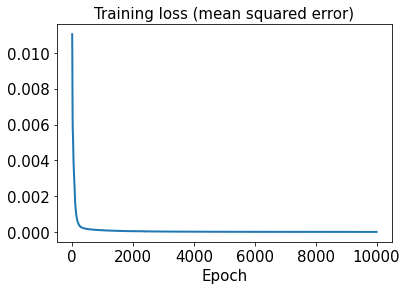

In [26]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

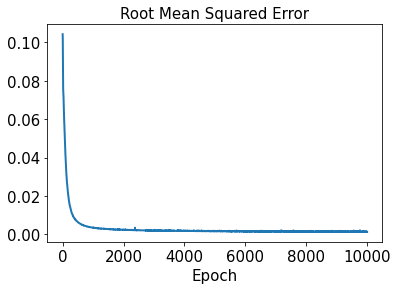

In [27]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [28]:
test_results = sd.evaluate(x_train)

10/10 [==============================] - 0s 2ms/step - loss: 2.1164e-05 - rmse: 0.0000e+00


In [29]:
decoded_train = sd.predict(x_train)

In [30]:
decoded_test = sd.predict(x_test)

In [31]:
error_train_abs = np.abs(decoded_train - y_train)

In [32]:
error_test_abs = np.abs(decoded_test - y_test)

In [33]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00014280775


In [34]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.005380946


In [35]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00014134722, 0.00013193973, 0.00011880409, 9.3337265e-05, 0.00011744009, 6.397911e-05, 9.949649e-05, 9.743481e-05, 6.132631e-05, 9.994932e-05, 0.00016674589, 0.00015396664, 9.881381e-05, 0.00017474734, 7.622394e-05, 0.0013748797, 0.00014914373, 7.6251985e-05, 8.497964e-05, 0.00013869569, 0.00012492739, 0.00011965221, 0.0018697465, 0.00012551242, 7.7071476e-05, 7.439363e-05, 0.00010041641, 6.999617e-05, 0.000113908885, 0.00010495294, 8.311267e-05, 0.00010104089, 8.7055116e-05, 8.1276004e-05, 0.0001387959, 0.000109905974, 0.00013631016, 9.171423e-05, 9.189329e-05, 0.00013277392, 8.8866174e-05, 0.00011873906, 0.00016430362, 0.00011439374, 0.000103477185, 0.00015582856, 0.00014072335, 0.000117600015, 0.00014453764, 7.124517e-05, 0.00023981964, 0.00013422861, 9.073176e-05, 0.00012621442, 0.00024558583, 0.00016592442, 9.230628e-05, 0.00012140252, 0.00011686572, 0.00010156941, 8.667773e-05, 0.00013948006, 0.0001516891, 9.42124e-05, 0.00019896537, 8.379427e-05, 8.934093e-05, 0.00010622589, 

In [36]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.0010467244, 0.013038193, 0.00039851046, 0.000197242, 0.0002567233, 0.087744, 0.011324618, 0.00036446258, 0.000546301, 0.0005226922, 0.19111092, 0.0072818855, 0.00032195507, 0.00053071714, 0.0012861528, 0.018992605, 0.00046604348, 0.0002697268, 0.008679501, 0.0037523676, 0.000328905, 0.00046977313, 0.003616976, 0.00087029097, 0.0003397998, 0.0006074077, 0.00028906748, 0.016254403, 0.00026394514, 0.001693116, 0.00057696993, 0.031878185, 0.00025028383, 0.0005359818, 0.0006018481, 0.0065639284, 0.00053967, 0.0006569281, 0.0020179101, 0.0021356558, 0.0004426695, 0.0005753689, 0.00039232566, 0.0038975587, 0.00313131, 0.0004438695, 0.00020758469, 0.0044255583, 0.021002756, 0.00026835926, 0.0003628393, 0.010062175, 0.0003599232, 0.00035943853, 0.008496288, 0.0056880536, 0.00039330786, 0.022329587, 0.0031220752, 0.00041675684, 0.0006573295, 0.00065033935, 0.0003740386, 0.0012104311, 0.0014530652, 0.00076730835, 0.0044483705, 0.0077563184, 0.0007422477, 0.000331036, 0.0003535959, 0.0003110623

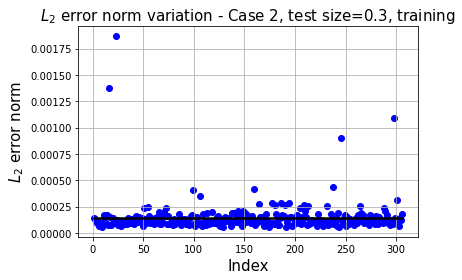

In [37]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 2, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

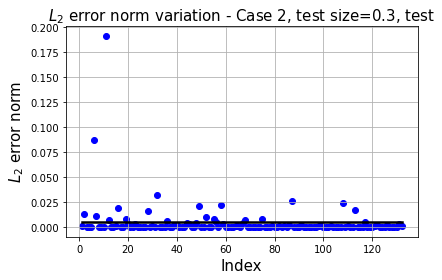

In [38]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 2, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

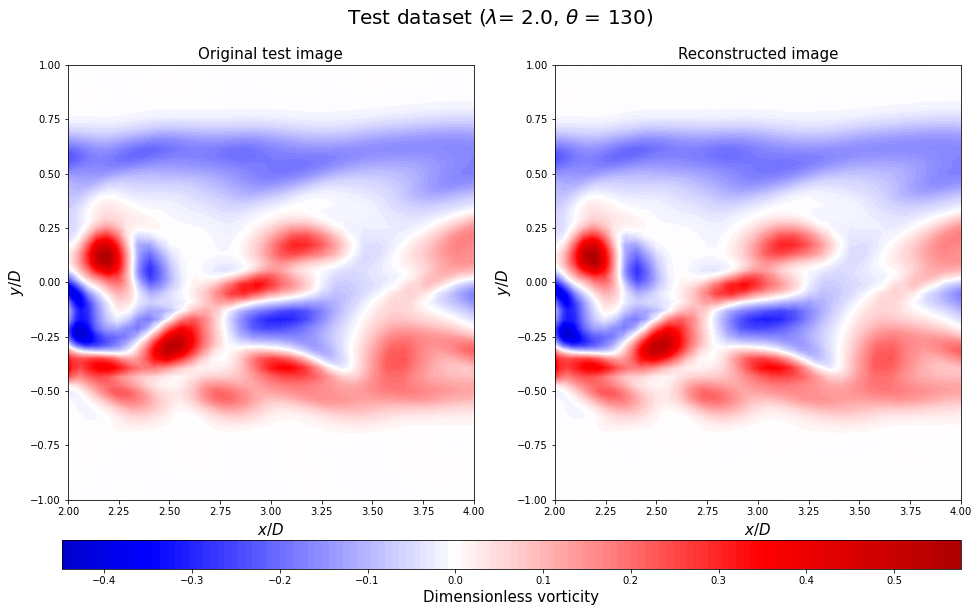

In [41]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

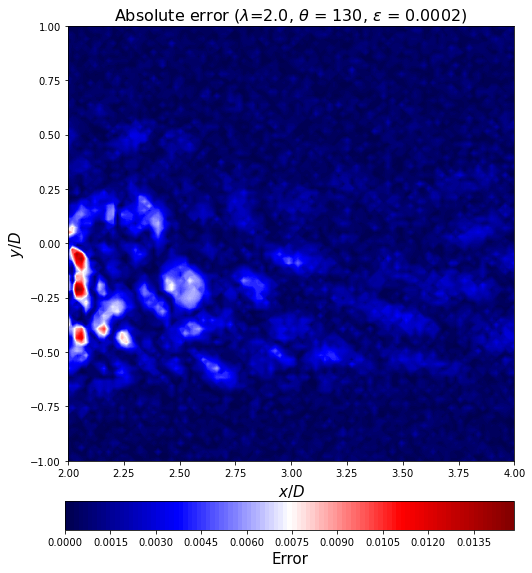

In [40]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()